RECONEIXENT CARÀCTERS

In [1]:
import pandas as pd

df = pd.read_csv('Training.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()  #Dóna la informació del Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [13]:
df.nunique()  #Indica el valors únics de cada columna

0      10
1       1
2       1
3       1
4       1
       ..
780     3
781     1
782     1
783     1
784     1
Length: 785, dtype: int64

In [8]:
df.duplicated().sum()   #Files duplicades

0

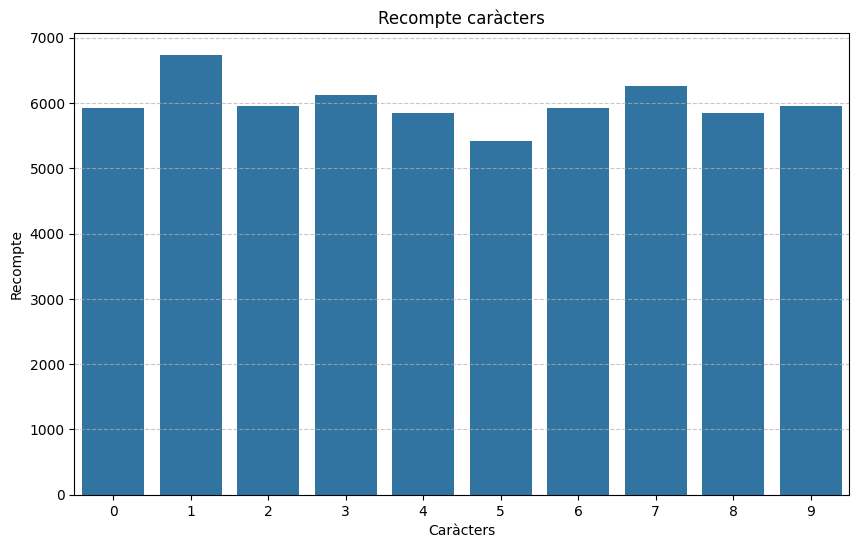

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el recompte dels caràcters de la primera columna (etiquetes)
counts = df[0].value_counts().sort_index()

# Crear la gràfica de barres amb Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.title('Recompte caràcters')
plt.xlabel('Caràcters')
plt.ylabel('Recompte')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Models
train test 90/10

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(df.columns[0], axis=1)  #Dades sense etiquetes
y = df[df.columns[0]]  #etiques

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

print(X_train)

       1    2    3    4    5    6    7    8    9    10   ...  775  776  777   
26825    0    0    0    0    0    0    0    0    0    0  ...    0    0    0  \
1935     0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
11950    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
40265    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
52553    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
50970    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
37231    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2543     0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
20992    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59058    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780  781  782  783  784  
26825   

In [4]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(10,4), max_iter=1000) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

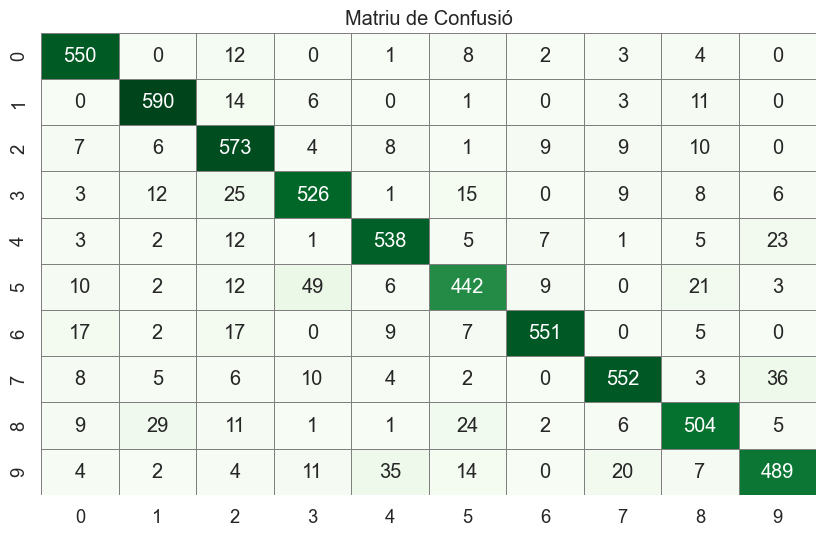


Informe de Clasificación:
               precision    recall  f1-score      support
0              0.900164  0.948276  0.923594   580.000000
1              0.907692  0.944000  0.925490   625.000000
2              0.835277  0.913876  0.872810   627.000000
3              0.865132  0.869421  0.867271   605.000000
4              0.892206  0.901173  0.896667   597.000000
5              0.851638  0.797834  0.823858   554.000000
6              0.950000  0.906250  0.927609   608.000000
7              0.915423  0.881789  0.898291   626.000000
8              0.871972  0.851351  0.861538   592.000000
9              0.870107  0.834471  0.851916   586.000000
accuracy       0.885833  0.885833  0.885833     0.885833
macro avg      0.885961  0.884844  0.884905  6000.000000
weighted avg   0.886287  0.885833  0.885561  6000.000000


In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Matriz confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear el mapa de calor de Matrix Confusión
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Escala de font
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', linecolor='grey', linewidths=[0.5, 0.5], cbar=False)
plt.title('Matriu de Confusió')
plt.show()

#Informe de Classificació
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()
print("\nInforme de Clasificación:\n", df_classification_rep)
